# Background

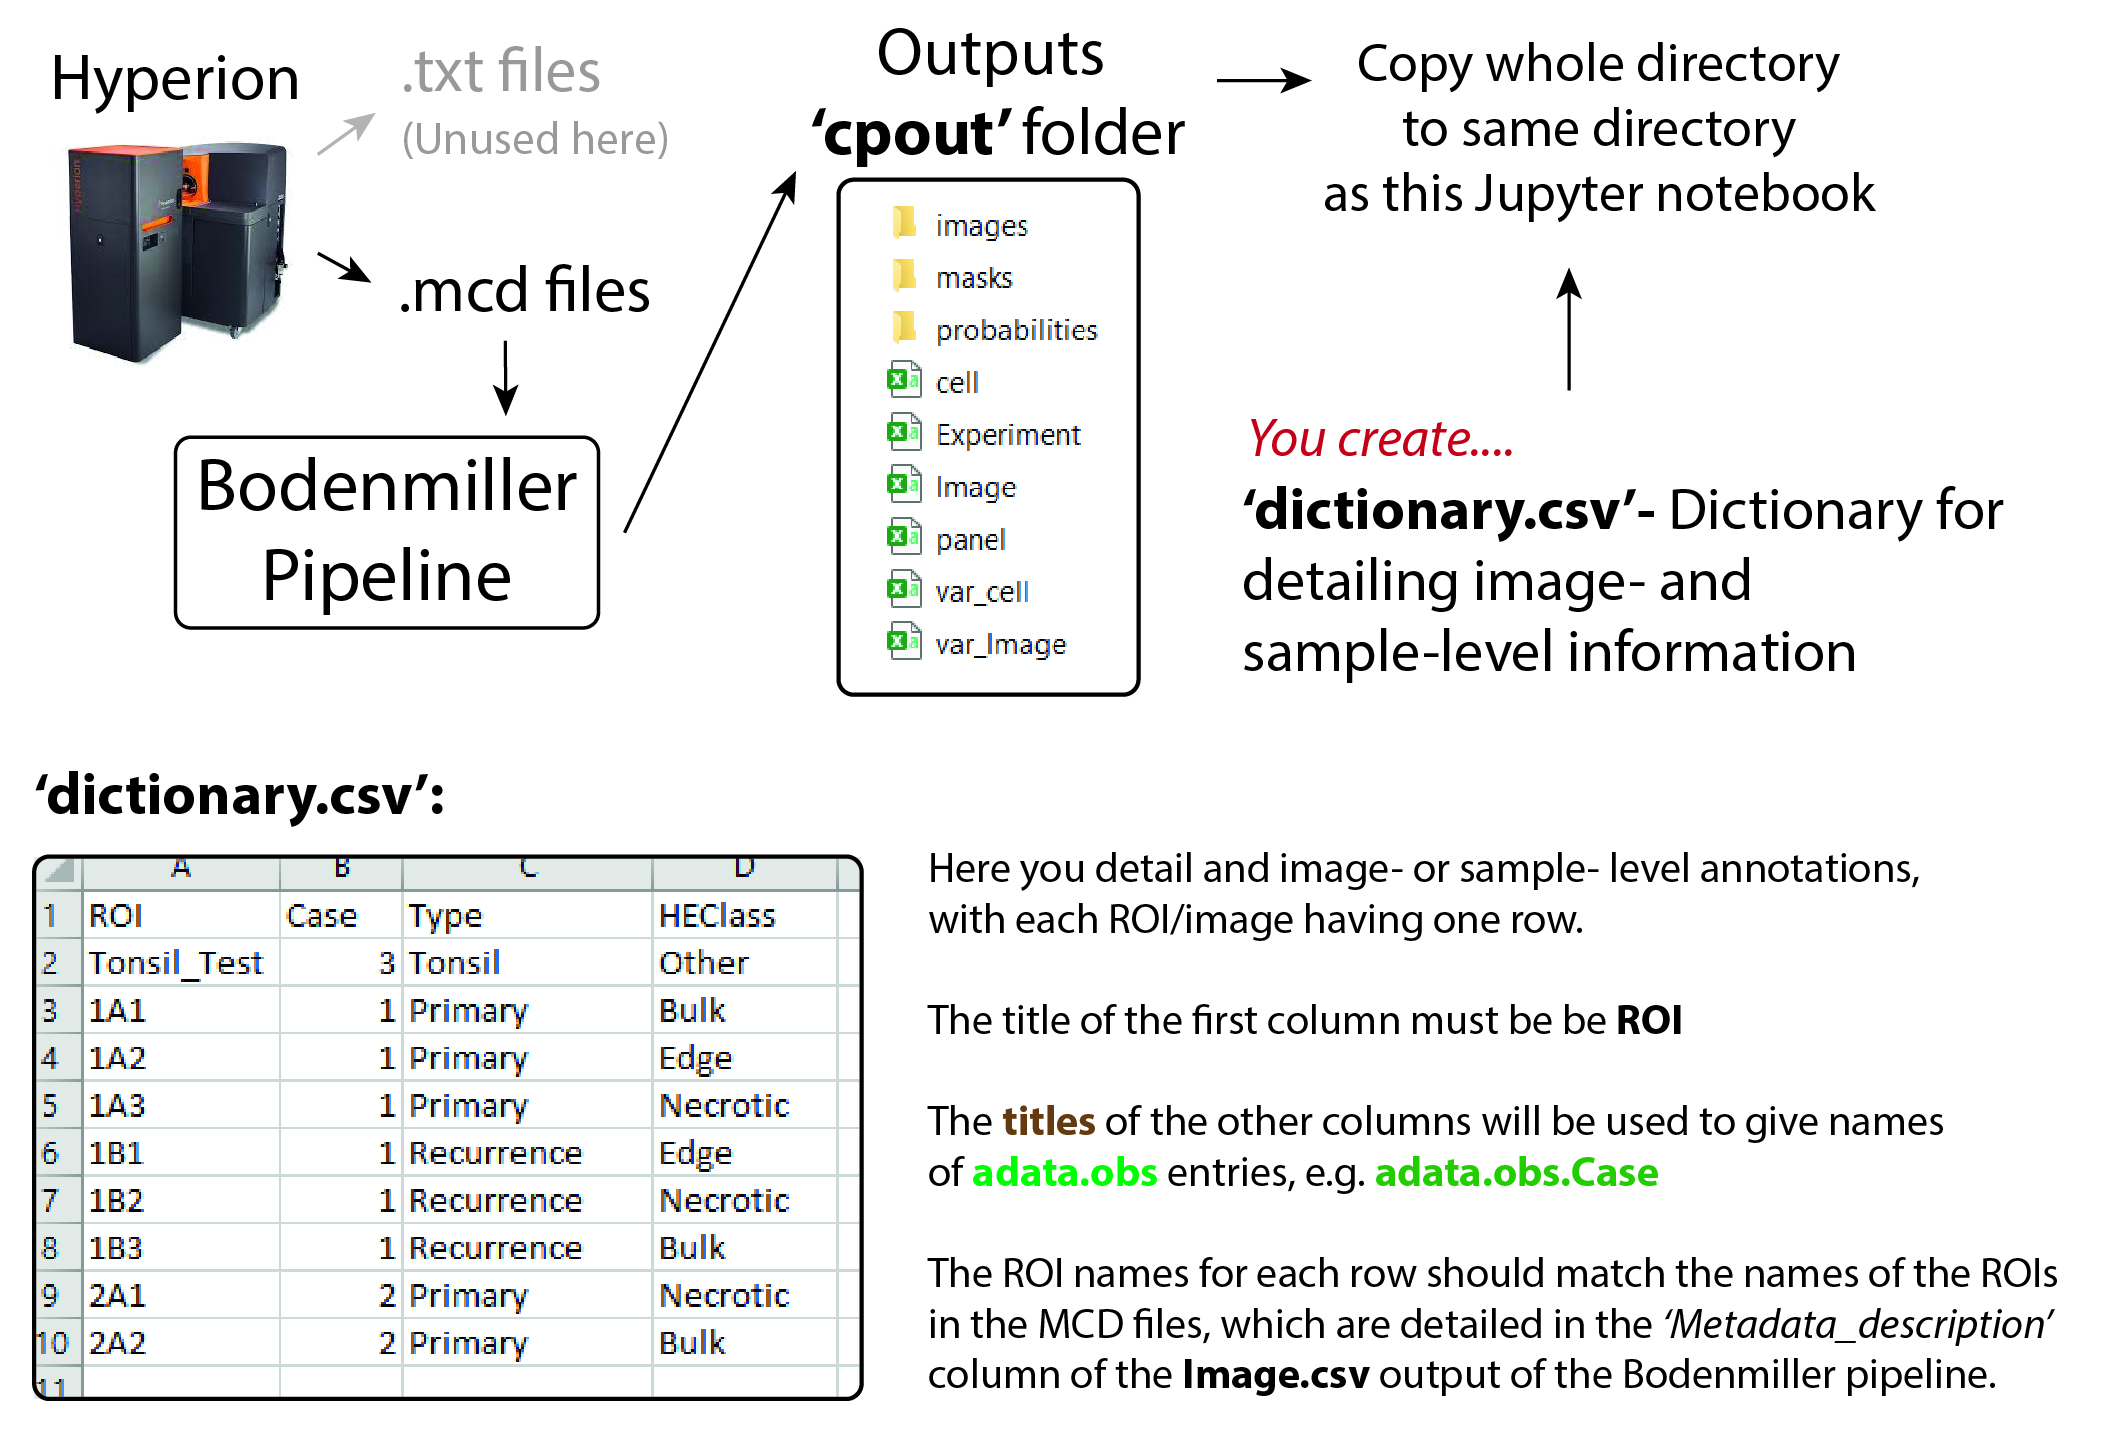

In [1]:
from IPython.display import Image
Image("pipeline.jpg")

### <a id="celltable"><font color='blue'>Required files and setup</font></a>

This pieline assumes you have just finished the final step of the Bodenmiller Pipeline, the last step of which creates a folder called **cpout** in the **analysis** folder.

Copy the **cpout** folder into the same directory as this notebook.

Within the **cpout** folder, there should the following files and folders

- **Image.csv** - Contains metadata for each region of interest
- **cell.csv** - The cell table with all the extracted single cell data
- **panel.csv** - The panel file used in the Bodenmiller pipeline setup
- **masks** - The cell masks in a folder
- **images** - The image stacks for the channels in a folder

In older versions of the pipeline, you may also have.

- **acquisition_metadata.csv** - Similar to image.csv, contains metadata for each region of interest

### <a id="celltable"><font color='blue'>Tips getting a cell table from the Bodenmiller pipeline</font></a>
If you used the Bodenmiller pipeline, the cell table will be called **'cell.csv'**. However, the columns will not obviously match up with the markers, and it's also not clear which image the cells come from! For the markers, the intensity of each will be in a number columns equal to the number of channels you had in your experiment, each prefixed *'Intensity_MeanIntensity_FullStack'*. The image the cells came from is identified by the column *ImageNumber*. This matches up with a column in the **Image.csv**, in which you can get the ROI names and file names from the colummns that begin with *Metadata_*. If your cell.csv or Image.csv files are missing from the cell profiler output folder, you need to go to the final CellProfiler step in the Bodenmiller pipeline and make sure this information is being exported. Go to the first *ExportToSpreadsheet* entry in CellProfiler, then set  *'Select the measurements to export'* to *No*, if you just want to export everything. This can results in a pretty huge cell table with loads of useless information. Alternatively, select *Yes*, then nake sure *Experiment* and *Image* are ticked. Under *cell*, tick *Location --> Center*, and *Intensity --> MeanIntensity*. This will result in a much smaller cell table.


### <font color='blue'>Creating a dictionary file to add meta information about our cells</font>
Often we have extra meta information about the cells which we would like to include in our analyses, most commmonly these are which patient, sample or group the cells have come from. This metainformation is at the image-level, ie. all cells from the same image will be labelled with the same meta information. For help creating the dictionary, see the image above.

**Save dictionary.csv in the same folder as this noteobok**

<font color='red'>**You no longer need to supply a columns.csv or clean up the cell table**</font>

# Import required packages

In [ ]:
import scanpy as sc
import anndata as ad

import SpatialBiologyToolkit.imc_import_bodenmiller as imc_import
import SpatialBiologyToolkit.utils as utils

# 1. Importing sample and panel information

In [ ]:
imc_import.import_bodenmiller?

In [ ]:
sample_df, panel_df = imc_import.import_bodenmiller()

# 2. Check and adjust *panel_df.csv* and *sample_df.csv* files
<font color='red'>**These files are created in this directory, and can be checked and edited using Excel before the next step**</font>


# 3. Creating AnnData object

In [ ]:
imc_import.setup_anndata?

In [ ]:
%%time

adata = imc_import.setup_anndata(dictionary='dictionary.csv',
                                non_cat_obs=[], #By default all entries in the dictionary are assummed to be categories unless they are in this list
                                marker_normalisation='q99.9',)

# 4. Creating image folders

In [ ]:
imc_import.stacks_to_imagefolders?

In [ ]:
%%time

imc_import.stacks_to_imagefolders()

# 5. Initial QC check

In [ ]:
# Plot a heat of all the markers
sc.pl.matrixplot(adata, adata.var_names, groupby='ROI')

# 6. Remove unused ROIs or markers

In [ ]:
imc_import.remove_ROIs_and_markers?

In [ ]:
adata = imc_import.remove_ROIs_and_markers(adata, 
                                           ROIs_to_remove=['ROI_name_1','ROI_name_2'])

# 7. Save AnnData object

In [ ]:
%%time

adata.write('adata_freshimport.h5ad')